U.S. Dept. of Education College Scorecard
Notebook for Codementor Machine Learning Class 1

We have been hired as a consultant for a college placement service.  We have been tasked with designing an engine for their college placement tool.  This tool will take some basic information from the student, including budget and SAT scores, and recommend a range of possible schools to start their search.

Download data from Kaggle.  Includes a 1.2GB sqlite database.  Connect to the database, extract data, create a Pandas dataframe for study.

Python has a handy built-in module for sqlite.  See: https://docs.python.org/2/library/sqlite3.html

In [1]:
%matplotlib inline
# allows plotting in cells, we'll use later on.
import pylab
pylab.rcParams['figure.figsize'] = (10, 6) # set a larger figure size

In [2]:
import sqlite3
conn = sqlite3.connect('C:/Users/peter/CM-ML-Class/1/data/database.sqlite')


In [3]:
# List the tables in this database!

query = """
SELECT name from sqlite_master WHERE type='table';
"""
c = conn.cursor()
c.execute(query)
data = c.fetchall()  # you can also iterate over c e.g. for row in c: doStuff(data)
print data

[(u'Scorecard',)]


A pandas dataframe will serve as our starting point for data exploration and predictive modeling.  Pandas includes a large number of interfaces to different data types, including sqlite.  See: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_sql_query.html

The table fields are documented in the pdfs that accompany the data.  It's important to get a basic analysis started quickly.  Let's choose some fields related to our idea (college cost vs. value) and get to work!  We can return later to grab more raw data.

In [4]:
import pandas

In [7]:
query = """
SELECT UNITID,
       INSTNM,
       CONTROL as type,
       COSTT4_A AvgYrCostAcademic,
       COSTT4_P AvgYrCostProgram,
       md_earn_wne_p10 medEarn10yrs,
       md_earn_wne_p6 medEarn6yrs,
       Year,
       UGDS NumStudents,
       SATMTMID Math,
       SATVRMID Verbal,
       SATWRMID Writing,
       STABBR State,
       GRAD_DEBT_MDN DebtAtGrad,
       C150_4 completionRate
       
FROM Scorecard
WHERE Year='{0}'
"""
# I found that 2011 is the latest year with earnings data!
# Plan: use 2013 cost and 2011 earnings.  
df2013 = pandas.read_sql(query.format(2013), conn)
df2011 = pandas.read_sql(query.format(2011), conn)
#df2010 = pandas.read_sql(query.format(2010), conn)

In [147]:
df2010

,UNITID,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
0,100654,Alabama A & M University,Public,13762.0,NaN,None,None,2010,4930.0,420.0,425.0,410.0,AL,27070.5,0.3306
1,100663,University of Alabama at Birmingham,Public,18003.0,NaN,None,None,2010,10661.0,600.0,585.0,NaN,AL,19691,0.4108
2,100690,Amridge University,Private nonprofit,20700.0,NaN,None,None,2010,370.0,NaN,NaN,NaN,AL,22000,0.2308
3,100706,University of Alabama at Huntsville,Public,17064.0,NaN,None,None,2010,5828.0,583.0,570.0,NaN,AL,20678,0.4364
4,100724,Alabama State University,Public,14390.0,NaN,None,None,2010,4882.0,370.0,400.0,NaN,AL,29433,0.2399
5,100751,The University of Alabama,Public,21565.0,NaN,None,None,2010,24376.0,560.0,555.0,540.0,AL,20798,0.6726
6,100760,Central Alabama Community College,Public,7109.0,NaN,None,None,2010,2341.0,NaN,NaN,NaN,AL,14750,NaN
7,100812,Athens State University,Public,NaN,NaN,None,None,2010,3414.0,NaN,NaN,NaN,AL,17947,NaN
8,100830,Auburn University at Montgomery,Public,14367.0,NaN,None,None,2010,4816.0,NaN,NaN,NaN,AL,20450,0.2455
9,100858,Auburn University,Public,19490.0,NaN,None,None,2010,20221.0,610.0,595.0,585.0,AL,PrivacySuppressed,0.6644


In [152]:
mydataframe = pandas.DataFrame({'temp':[75, 55, 65, 97], 'day':['M', 'Tu', 'Wed', 'Th'], 'humidity':[12, 15, 9, 3]})
mydataframe.set_index(['day'], inplace=True)
mydataframe

,humidity,temp
day,,
M,12,75
Tu,15,55
Wed,9,65
Th,3,97


In [166]:
mydataframe.loc['Tu':'Th']

,humidity,temp
day,,
Tu,15,55
Wed,9,65
Th,3,97


In [153]:
df2010.index

RangeIndex(start=0, stop=7414, step=1)

In [154]:
df2010_withNewIndex = df2010.set_index(['UNITID'])
# or df2010.set_index(['UNITID'], inplace=True)
# instead of a column name we could have also provided an array
df2010_withNewIndex.index

Int64Index([  100654,   100663,   100690,   100706,   100724,   100751,
              100760,   100812,   100830,   100858,
            ...
            45891905, 45891906, 45891907, 45891908, 45896401, 45896402,
            45897301, 45897302, 45897303, 45897304],
           dtype='int64', name=u'UNITID', length=7414)

In [99]:
# our indices are specific integers, not in a continuous range.  We could also use strings.

Mini-lesson/Diversion: Basic DataFrame manipulation



In [155]:
# row selection

# method 1: loc (label-based)
df2010_withNewIndex.loc[100654]

INSTNM               Alabama A & M University
type                                   Public
AvgYrCostAcademic                       13762
AvgYrCostProgram                          NaN
medEarn10yrs                             None
medEarn6yrs                              None
Year                                     2010
NumStudents                              4930
Math                                      420
Verbal                                    425
Writing                                   410
State                                      AL
DebtAtGrad                            27070.5
completionRate                         0.3306
Name: 100654, dtype: object

In [156]:
df2010_withNewIndex.loc[ [100654, 100663, 100690] ]

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
UNITID,,,,,,,,,,,,,,
100654,Alabama A & M University,Public,13762.0,NaN,None,None,2010,4930.0,420.0,425.0,410.0,AL,27070.5,0.3306
100663,University of Alabama at Birmingham,Public,18003.0,NaN,None,None,2010,10661.0,600.0,585.0,NaN,AL,19691,0.4108
100690,Amridge University,Private nonprofit,20700.0,NaN,None,None,2010,370.0,NaN,NaN,NaN,AL,22000,0.2308


In [168]:
# row selection method 2: using a Boolean array
df2010_withNewIndex.loc[[True, False, True, True, False]]

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
UNITID,,,,,,,,,,,,,,
100654,Alabama A & M University,Public,13762.0,NaN,None,None,2010,4930.0,420.0,425.0,410.0,AL,27070.5,0.3306
100690,Amridge University,Private nonprofit,20700.0,NaN,None,None,2010,370.0,NaN,NaN,NaN,AL,22000,0.2308
100706,University of Alabama at Huntsville,Public,17064.0,NaN,None,None,2010,5828.0,583.0,570.0,NaN,AL,20678,0.4364


In [171]:
# lets make a useful Boolean array
hicost = df2010_withNewIndex.AvgYrCostAcademic > 50000


hicost

UNITID
100654      False
100663      False
100690      False
100706      False
100724      False
100751      False
100760      False
100812      False
100830      False
100858      False
100937      False
101028      False
101073      False
101116      False
101143      False
101161      False
101189      False
101240      False
101286      False
101295      False
101301      False
101365      False
101435      False
101453      False
101462      False
101480      False
101499      False
101505      False
101514      False
101541      False
            ...  
45057102    False
45312701    False
45312702    False
45316301    False
45316302    False
45316303    False
45316304    False
45316305    False
45316306    False
45321501    False
45321502    False
45321503    False
45666701    False
45666702    False
45666703    False
45786401    False
45891901    False
45891902    False
45891903    False
45891904    False
45891905    False
45891906    False
45891907    False
45891908    False
458

In [170]:
hicost.describe()

count      7414
unique        2
top       False
freq       7299
Name: AvgYrCostAcademic, dtype: object

In [172]:
# use the boolean array to select rows.  the ':' means all columns; we could also pass a column list
df2010_withNewIndex.loc[hicost]

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
UNITID,,,,,,,,,,,,,,
109651,Art Center College of Design,Private nonprofit,52990.0,NaN,None,None,2010,1540.0,NaN,NaN,NaN,CA,33867,0.7143
111081,California Institute of the Arts,Private nonprofit,51823.0,NaN,None,None,2010,895.0,NaN,NaN,NaN,CA,25000,0.6497
111948,Chapman University,Private nonprofit,51766.0,NaN,None,None,2010,4879.0,605.0,590.0,605.0,CA,19625,0.7022
112260,Claremont McKenna College,Private nonprofit,52934.0,NaN,None,None,2010,1253.0,700.0,690.0,NaN,CA,8103.5,0.9319
113698,Dominican University of California,Private nonprofit,50250.0,NaN,None,None,2010,1561.0,510.0,510.0,517.0,CA,22986,0.5507
115409,Harvey Mudd College,Private nonprofit,52737.0,NaN,None,None,2010,771.0,770.0,715.0,715.0,CA,20125,0.8698
117946,Loyola Marymount University,Private nonprofit,52071.0,NaN,None,None,2010,5796.0,610.0,595.0,610.0,CA,17925,0.7971
118888,Mills College,Private nonprofit,51027.0,NaN,None,None,2010,957.0,545.0,585.0,565.0,CA,22125,0.6148
120254,Occidental College,Private nonprofit,52973.0,NaN,None,None,2010,2073.0,645.0,645.0,645.0,CA,14895,0.8468


In [173]:
df2010_withNewIndex.loc[df2010_withNewIndex.AvgYrCostAcademic > 50000]

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
UNITID,,,,,,,,,,,,,,
109651,Art Center College of Design,Private nonprofit,52990.0,NaN,None,None,2010,1540.0,NaN,NaN,NaN,CA,33867,0.7143
111081,California Institute of the Arts,Private nonprofit,51823.0,NaN,None,None,2010,895.0,NaN,NaN,NaN,CA,25000,0.6497
111948,Chapman University,Private nonprofit,51766.0,NaN,None,None,2010,4879.0,605.0,590.0,605.0,CA,19625,0.7022
112260,Claremont McKenna College,Private nonprofit,52934.0,NaN,None,None,2010,1253.0,700.0,690.0,NaN,CA,8103.5,0.9319
113698,Dominican University of California,Private nonprofit,50250.0,NaN,None,None,2010,1561.0,510.0,510.0,517.0,CA,22986,0.5507
115409,Harvey Mudd College,Private nonprofit,52737.0,NaN,None,None,2010,771.0,770.0,715.0,715.0,CA,20125,0.8698
117946,Loyola Marymount University,Private nonprofit,52071.0,NaN,None,None,2010,5796.0,610.0,595.0,610.0,CA,17925,0.7971
118888,Mills College,Private nonprofit,51027.0,NaN,None,None,2010,957.0,545.0,585.0,565.0,CA,22125,0.6148
120254,Occidental College,Private nonprofit,52973.0,NaN,None,None,2010,2073.0,645.0,645.0,645.0,CA,14895,0.8468


In [174]:
# row selection method 3: integer/row number
df2010_withNewIndex.iloc[1]

INSTNM               University of Alabama at Birmingham
type                                              Public
AvgYrCostAcademic                                  18003
AvgYrCostProgram                                     NaN
medEarn10yrs                                        None
medEarn6yrs                                         None
Year                                                2010
NumStudents                                        10661
Math                                                 600
Verbal                                               585
Writing                                              NaN
State                                                 AL
DebtAtGrad                                         19691
completionRate                                    0.4108
Name: 100663, dtype: object

In [175]:
df2010_withNewIndex.iloc[0:3]

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
UNITID,,,,,,,,,,,,,,
100654,Alabama A & M University,Public,13762.0,NaN,None,None,2010,4930.0,420.0,425.0,410.0,AL,27070.5,0.3306
100663,University of Alabama at Birmingham,Public,18003.0,NaN,None,None,2010,10661.0,600.0,585.0,NaN,AL,19691,0.4108
100690,Amridge University,Private nonprofit,20700.0,NaN,None,None,2010,370.0,NaN,NaN,NaN,AL,22000,0.2308


In [178]:
df2010_withNewIndex.iloc[0:3][['INSTNM', 'Math', 'Verbal']]

,INSTNM,Math,Verbal
UNITID,,,
100654,Alabama A & M University,420.0,425.0
100663,University of Alabama at Birmingham,600.0,585.0
100690,Amridge University,NaN,NaN


In [181]:
df2010_withNewIndex.iloc[42:47, 2:5]

,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs
UNITID,,,
101958,23965.0,NaN,None
101994,6663.0,NaN,None
102030,7317.0,NaN,None
102049,32527.0,NaN,None
102058,6147.0,NaN,None


In [182]:
# method 4: .ix
# a single label; a single integer;
# a list of labels; a list of integers;
# a slice of integers; a slice of labels;
# a Boolean array

# once you get good at using it, you can probably avoid
# switching between .loc and iloc

df2010_withNewIndex.ix[100654]

INSTNM               Alabama A & M University
type                                   Public
AvgYrCostAcademic                       13762
AvgYrCostProgram                          NaN
medEarn10yrs                             None
medEarn6yrs                              None
Year                                     2010
NumStudents                              4930
Math                                      420
Verbal                                    425
Writing                                   410
State                                      AL
DebtAtGrad                            27070.5
completionRate                         0.3306
Name: 100654, dtype: object

In [183]:
df2010_withNewIndex.ix[1]  # error; .loc (label-based) operator takes precedence

KeyError: 1L

In [185]:
# following are equivalent ways to select a column
x = df2010.AvgYrCostAcademic
x = df2010['AvgYrCostAcademic']
#x = df2010[[3]]
type(x)


pandas.core.series.Series

Pandas series documentation here: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html

It's a numpy array together with an index


In [186]:
x.head()

0    13762.0
1    18003.0
2    20700.0
3    17064.0
4    14390.0
Name: AvgYrCostAcademic, dtype: float64

In [187]:
x[0:3]

0    13762.0
1    18003.0
2    20700.0
Name: AvgYrCostAcademic, dtype: float64

In [188]:
x.iloc[2]

20700.0

In [189]:
# columns have methods which can produce, for example, other columns
y = x.describe()
y

count     4055.000000
mean     22286.462392
std      11126.865080
min       3368.000000
25%      12936.500000
50%      20450.000000
75%      29281.000000
max      58650.000000
Name: AvgYrCostAcademic, dtype: float64

In [190]:
type(y)

pandas.core.series.Series

In [191]:
y.index

Index([u'count', u'mean', u'std', u'min', u'25%', u'50%', u'75%', u'max'], dtype='object')

In [192]:
y.values

array([  4055.        ,  22286.46239211,  11126.86508007,   3368.        ,
        12936.5       ,  20450.        ,  29281.        ,  58650.        ])

In [193]:
y['25%']

12936.5

In [24]:
# selecting multiple columns makes a dataframe
z = df2010[['Math', 'Verbal', 'State']]
type(z)


pandas.core.frame.DataFrame

In [21]:
z.head()

,Math,Verbal,State
0,420.0,425.0,AL
1,600.0,585.0,AL
2,NaN,NaN,AL
3,583.0,570.0,AL
4,370.0,400.0,AL


In [18]:
type(x[0])

numpy.float64

In [16]:
# slicing a series
# format is start : end : by
x[0:5]

0    13762.0
1    18003.0
2    20700.0
3    17064.0
4    14390.0
Name: AvgYrCostAcademic, dtype: float64

In [17]:
type(x[0:5])

pandas.core.series.Series

End of mini-lesson

In [8]:
df2010.describe()

,AvgYrCostAcademic,AvgYrCostProgram,Year,NumStudents,Math,Verbal,Writing,completionRate
count,4055.000000,2423.000000,7414.0,6864.000000,1289.000000,1273.000000,732.000000,2319.000000
mean,22286.462392,24213.170863,2010.0,2507.803176,532.643134,526.416339,524.505464,0.478494
std,11126.865080,9926.673725,0.0,5861.955944,69.352965,66.175245,75.447076,0.215095
min,3368.000000,0.000000,2010.0,0.000000,345.000000,360.000000,355.000000,0.000000
25%,12936.500000,17644.000000,2010.0,141.000000,485.000000,480.000000,470.000000,0.320100
50%,20450.000000,23086.000000,2010.0,599.000000,520.000000,515.000000,515.000000,0.468400
75%,29281.000000,29179.500000,2010.0,2217.250000,565.000000,560.000000,561.000000,0.627250
max,58650.000000,96720.000000,2010.0,253594.000000,785.000000,750.000000,755.000000,1.000000


In [9]:
df2011

,INSTNM,type,AvgYrCostAcademic,AvgYrCostProgram,medEarn10yrs,medEarn6yrs,Year,NumStudents,Math,Verbal,Writing,State,DebtAtGrad,completionRate
0,Alabama A & M University,Public,14965.0,NaN,31400,22800,2011,4112.0,405.0,410.0,405.0,AL,29573,0.3171
1,University of Alabama at Birmingham,Public,19547.0,NaN,40300,33200,2011,10854.0,570.0,565.0,NaN,AL,20700,0.4462
2,Amridge University,Private nonprofit,11540.0,NaN,38100,32800,2011,360.0,NaN,NaN,NaN,AL,22370,0.2500
3,University of Alabama at Huntsville,Public,19072.0,NaN,46600,36700,2011,5755.0,595.0,565.0,NaN,AL,22000,0.4537
4,Alabama State University,Public,15986.0,NaN,27800,19300,2011,4719.0,400.0,405.0,NaN,AL,31000,0.2621
5,The University of Alabama,Public,21681.0,NaN,42400,32900,2011,25613.0,570.0,560.0,555.0,AL,22500,0.6579
6,Central Alabama Community College,Public,7485.0,NaN,27100,22700,2011,2338.0,NaN,NaN,NaN,AL,PrivacySuppressed,NaN
7,Athens State University,Public,NaN,NaN,39700,33300,2011,3218.0,NaN,NaN,NaN,AL,17850,NaN
8,Auburn University at Montgomery,Public,15179.0,NaN,34800,27500,2011,4403.0,NaN,NaN,NaN,AL,21169,0.3327
9,Auburn University,Public,21140.0,NaN,45400,35900,2011,20436.0,570.0,550.0,540.0,AL,20500,0.6628


In [10]:
df2011.describe()

,AvgYrCostAcademic,AvgYrCostProgram,Year,NumStudents,Math,Verbal,Writing,completionRate
count,4155.000000,2536.000000,7675.0,7052.000000,1290.000000,1267.000000,748.000000,2370.000000
mean,23183.825993,17583.397476,2011.0,2440.643647,531.537209,524.199684,521.701872,0.473112
std,11432.356729,6304.445260,0.0,5848.348428,70.669769,68.647130,78.698776,0.216701
min,2200.000000,2134.000000,2011.0,0.000000,350.000000,285.000000,325.000000,0.000000
25%,13456.000000,12914.500000,2011.0,136.000000,485.000000,480.000000,465.000000,0.318050
50%,21785.000000,17039.000000,2011.0,513.000000,520.000000,515.000000,510.000000,0.466300
75%,29706.000000,21891.250000,2011.0,2083.750000,565.000000,560.000000,562.750000,0.622150
max,73450.000000,76545.000000,2011.0,249604.000000,780.000000,750.000000,755.000000,1.000000


In [195]:
df2011['earn10'] = pandas.to_numeric(df2011['medEarn10yrs'], errors='coerce')
df2011['sat'] = df2011['Math'] + df2011['Verbal']

In [196]:
df2011.describe()

,UNITID,AvgYrCostAcademic,AvgYrCostProgram,Year,NumStudents,Math,Verbal,Writing,completionRate,earn10,sat
count,7.675000e+03,4155.000000,2536.000000,7675.0,7052.000000,1290.000000,1267.000000,748.000000,2370.000000,5883.000000,1267.000000
mean,1.331383e+06,23183.825993,17583.397476,2011.0,2440.643647,531.537209,524.199684,521.701872,0.473112,33137.769845,1056.249408
std,5.868773e+06,11432.356729,6304.445260,0.0,5848.348428,70.669769,68.647130,78.698776,0.216701,14016.378720,137.196395
min,1.006540e+05,2200.000000,2134.000000,2011.0,0.000000,350.000000,285.000000,325.000000,0.000000,8400.000000,675.000000
25%,1.712295e+05,13456.000000,12914.500000,2011.0,136.000000,485.000000,480.000000,465.000000,0.318050,24200.000000,965.000000
50%,2.246420e+05,21785.000000,17039.000000,2011.0,513.000000,520.000000,515.000000,510.000000,0.466300,31000.000000,1035.000000
75%,4.416010e+05,29706.000000,21891.250000,2011.0,2083.750000,565.000000,560.000000,562.750000,0.622150,39100.000000,1125.000000
max,4.616340e+07,73450.000000,76545.000000,2011.0,249604.000000,780.000000,750.000000,755.000000,1.000000,250000.000000,1525.000000


Data pre-processing is a critical step.  Most machine learning algorithms, and really any type of quantitative analysis, requires data of sufficient quality in specific formats.

http://scikit-learn.org/stable/modules/preprocessing.html

That page is a great reference; think of it as a "Swiss-Army knife" for pre-processing.  Parts of it come in handy, but usually not everything for the same project.

Now for a first look at normalization (scale individual samples to have unit norm- important when we have similarity metrics), scaling (standardization by centering at the average and dividing by the SD, or, min-max scaling) and clustering (assigning labels to groups of similar samples).

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html

http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html

http://scikit-learn.org/stable/modules/clustering.html

In [197]:
dfc = df2011[['sat', 'AvgYrCostAcademic', 'earn10', 'completionRate']].dropna()

In [107]:
dfc.describe()


,sat,AvgYrCostAcademic,earn10,completionRate
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,1057.826667,30803.961667,43336.750000,0.550160
std,136.508206,12113.771300,10329.312014,0.177358
min,675.000000,2200.000000,17600.000000,0.053800
25%,965.000000,19742.250000,36600.000000,0.422125
50%,1035.000000,30326.000000,41700.000000,0.542450
75%,1126.000000,39742.250000,47500.000000,0.666975
max,1525.000000,57590.000000,116400.000000,0.974300


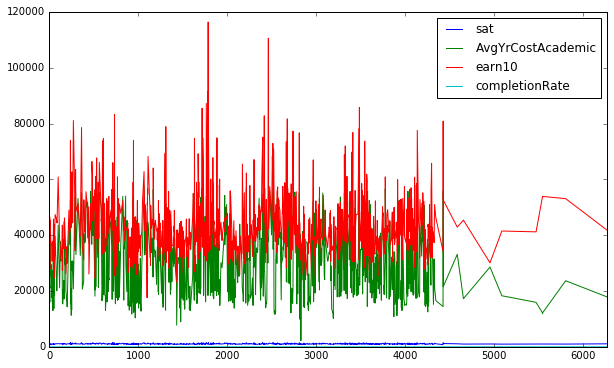

In [198]:
dfc.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000176DB390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000018AA4A58>]], dtype=object)

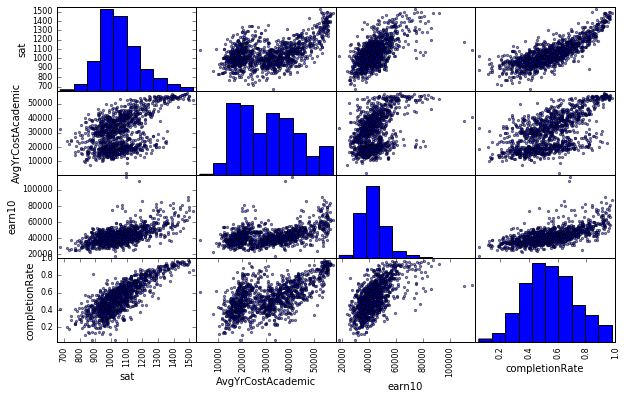

In [199]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(dfc)

In [110]:
import sklearn.preprocessing as skpp

In [200]:
dfnorm = pandas.DataFrame(skpp.normalize(dfc, axis=1)).rename(columns={0:'sat', 1:'cost', 2:'earn', 3:'gradrate'})
dfnorm.describe()
# one example of where you'd need this: spectral clustering

,sat,cost,earn,gradrate
count,1200.000000,1200.000000,1200.000000,1200.000000
mean,0.020306,0.559863,0.811218,0.000010
std,0.003536,0.138978,0.093612,0.000002
min,0.008879,0.058541,0.434900,0.000002
25%,0.017745,0.429005,0.743775,0.000009
50%,0.019860,0.603100,0.797427,0.000010
75%,0.022699,0.668159,0.902984,0.000012
max,0.035337,0.900296,0.997860,0.000018


In [201]:
dfnorm.head()

,sat,cost,earn,gradrate
0,0.023424,0.430111,0.902472,0.000009
1,0.025332,0.436271,0.899459,0.000010
2,0.023032,0.378675,0.925243,0.000009
3,0.025095,0.498338,0.866620,0.000008
4,0.023722,0.455148,0.890100,0.000014


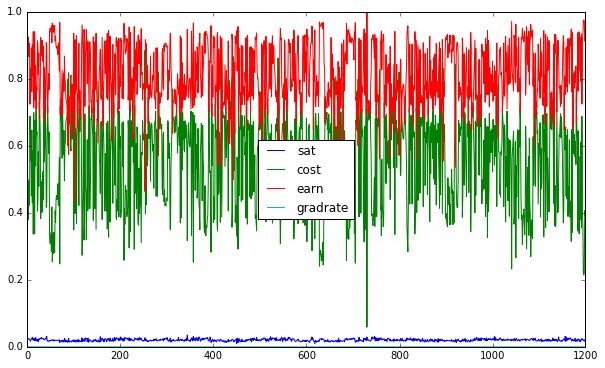

In [202]:
dfnorm.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000010A51630>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000011D682E8>]], dtype=object)

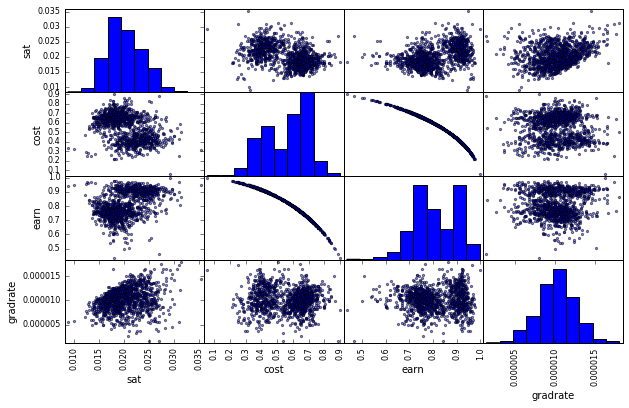

In [113]:
scatter_matrix(dfnorm)


In [205]:
pandas.DataFrame(skpp.scale(dfc)).rename(columns={0:'sat', 1:'cost', 2:'earn', 3:'gradrate'})

,sat,cost,earn,gradrate
0,-1.779585,-1.308062,-1.156101,-1.314611
1,0.565574,-0.929657,-0.294116,-0.586403
2,0.748790,-0.968885,0.316053,-0.544098
3,-1.852871,-1.223743,-1.504769,-1.624847
4,0.528931,-0.753421,-0.090726,0.607724
5,0.455645,-0.798099,0.199830,0.635363
6,0.455645,0.746903,-0.139152,0.448657
7,-2.292588,-0.462969,-0.555617,-1.223233
8,-0.247903,-0.118506,-0.604043,-0.176327
9,-0.900150,-1.080705,-0.797748,-1.325329


In [206]:
dfscale = pandas.DataFrame(skpp.scale(dfc)).rename(columns={0:'sat', 1:'cost', 2:'earn', 3:'gradrate'})
dfscale.describe()


,sat,cost,earn,gradrate
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03
mean,4.946044e-16,8.511710e-18,-2.812565e-17,5.458597e-17
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00
min,-2.805592e+00,-2.362261e+00,-2.492662e+00,-2.799796e+00
25%,-6.802915e-01,-9.135325e-01,-6.524693e-01,-7.222017e-01
50%,-1.672880e-01,-3.947251e-02,-1.585229e-01,-4.348992e-02
75%,4.996165e-01,7.381694e-01,4.032201e-01,6.589126e-01
max,3.423736e+00,2.212127e+00,7.076339e+00,2.392427e+00


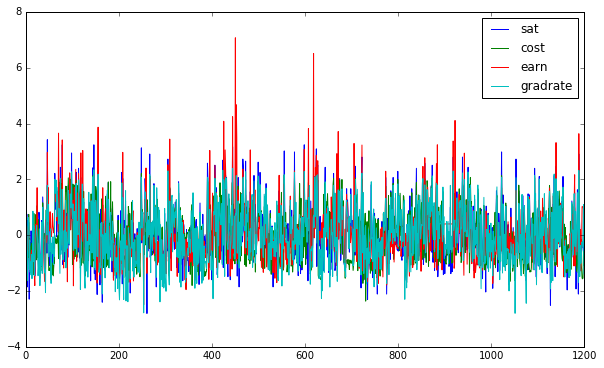

In [207]:
dfscale.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BA42CC0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001A7E8B70>]], dtype=object)

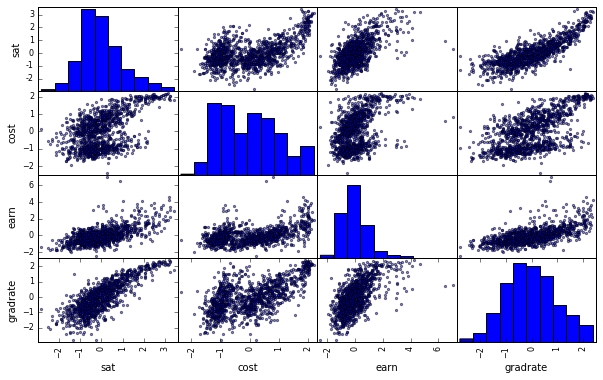

In [208]:
scatter_matrix(dfscale)

In [209]:
from sklearn.cluster import KMeans
km = KMeans(init='k-means++', n_clusters=3)
km.fit(dfscale)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

In [210]:
clusters = km.predict(dfscale)

In [211]:
clusters

array([2, 2, 0, ..., 2, 0, 2])

In [212]:
dfscale['cluster'] = clusters

In [213]:
dfscale.describe()

,sat,cost,earn,gradrate,cluster
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000
mean,4.946044e-16,8.511710e-18,-2.812565e-17,5.458597e-17,1.005000
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,0.915974
min,-2.805592e+00,-2.362261e+00,-2.492662e+00,-2.799796e+00,0.000000
25%,-6.802915e-01,-9.135325e-01,-6.524693e-01,-7.222017e-01,0.000000
50%,-1.672880e-01,-3.947251e-02,-1.585229e-01,-4.348992e-02,1.000000
75%,4.996165e-01,7.381694e-01,4.032201e-01,6.589126e-01,2.000000
max,3.423736e+00,2.212127e+00,7.076339e+00,2.392427e+00,2.000000


In [214]:
dfscale

,sat,cost,earn,gradrate,cluster
0,-1.779585,-1.308062,-1.156101,-1.314611,2
1,0.565574,-0.929657,-0.294116,-0.586403,2
2,0.748790,-0.968885,0.316053,-0.544098,0
3,-1.852871,-1.223743,-1.504769,-1.624847,2
4,0.528931,-0.753421,-0.090726,0.607724,0
5,0.455645,-0.798099,0.199830,0.635363,0
6,0.455645,0.746903,-0.139152,0.448657,0
7,-2.292588,-0.462969,-0.555617,-1.223233,2
8,-0.247903,-0.118506,-0.604043,-0.176327,0
9,-0.900150,-1.080705,-0.797748,-1.325329,2


Dataframe visualization: see http://pandas.pydata.org/pandas-docs/stable/visualization.html

In [123]:
dfscale.columns
dfscale.dtypes

sat         float64
cost        float64
earn        float64
gradrate    float64
cluster       int32
dtype: object

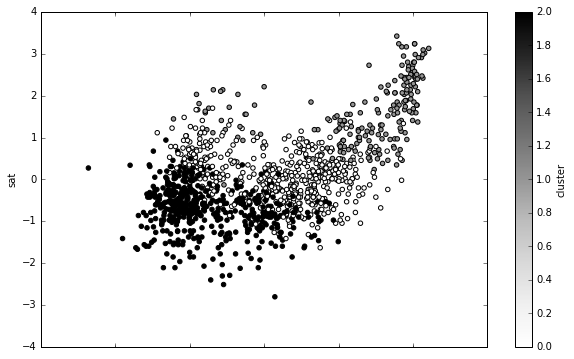

In [215]:
dfscale.plot.scatter(x='cost', y='sat', c='cluster');

We can also plot using matplotlib directly

http://matplotlib.org/1.5.0/api/index.html

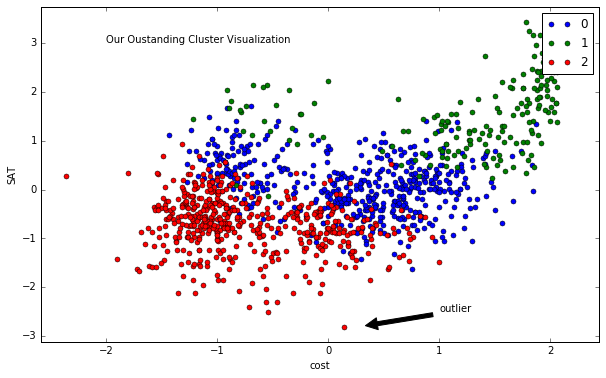

In [216]:
import matplotlib.pyplot as plt

groups = dfscale.groupby('cluster')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.cost, group.sat, marker='o', linestyle='', ms=5, label=name)
ax.legend()
ax.set_xlabel("cost")
ax.set_ylabel("SAT")
ax.text(-2, 3, 'Our Oustanding Cluster Visualization')
ax.annotate('outlier', xy=(0.3, -2.8), xytext=(1, -2.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001474C240>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x0000000015C6FFD0>]], dtype=object)

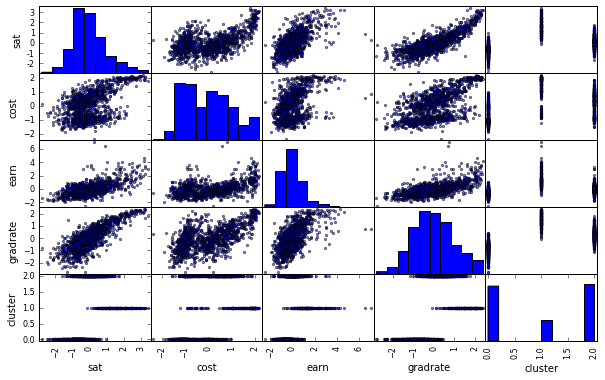

In [126]:
scatter_matrix(dfscale)

TODO: Build a pipeline: preprocess and cluster data

In [127]:
# we can extract data belonging to a particular cluster
dfscale[dfscale['cluster'] == 0].describe()

,sat,cost,earn,gradrate,cluster
count,492.000000,492.000000,492.000000,492.000000,492.0
mean,-0.727421,-0.705010,-0.592114,-0.889407,0.0
std,0.557109,0.612129,0.545130,0.561148,0.0
min,-2.805592,-2.362261,-2.492662,-2.799796,0.0
25%,-1.010079,-1.178610,-0.933341,-1.238604,0.0
50%,-0.698613,-0.909383,-0.637941,-0.839668,0.0
75%,-0.387147,-0.190934,-0.214213,-0.496575,0.0
max,0.939334,0.995732,1.023074,0.452606,0.0


In [217]:
# let's find out more about the different cluster characteristics
clustergroup = dfscale.groupby('cluster')
clustergroup.describe()

cost        earn    gradrate         sat
cluster                                                      
0       count  500.000000  500.000000  500.000000  500.000000
        mean     0.218027    0.014881    0.296607    0.089756
        std      0.727226    0.626698    0.505588    0.565646
        min     -1.436730   -1.814696   -1.171339   -1.633012
        25%     -0.402042   -0.403075   -0.048990   -0.313860
        50%      0.347563   -0.008402    0.303974    0.089214
        75%      0.763668    0.403220    0.639311    0.455645
        max      1.870721    3.289417    1.785492    1.701510
1       count  194.000000  194.000000  194.000000  194.000000
        mean     1.303200    1.462803    1.491198    1.616476
        std      0.844434    1.177738    0.523210    0.771167
        min     -1.218457   -0.875229   -0.078744   -0.130645
        25%      1.050713    0.688934    1.132305    1.014452
        50%      1.584687    1.226464    1.509382    1.573260
        75%      1.911951    1.882638    1.914804    2.141228
        max      2.212127    7.076339    2.392427    3.423736
2       count  506.000000  506.000000  506.000000  506.000000
        mean    -0.715087   -0.575543   -0.864814   -0.708447
        std      0.607692    0.551274    0.572978    0.564031
        min     -2.362261   -2.492662   -2.799796   -2.805592
        25%     -1.175183   -0.923656   -1.223233   -1.010079
        50%     -0.921110   -0.613728   -0.828669   -0.680291
        75%     -0.199977   -0.197264   -0.473731   -0.350504
        max      0.995732    1.023074    0.452606    0.939334

In [219]:
clustergroup.median()

,sat,cost,earn,gradrate
cluster,,,,
0,0.089214,0.347563,-0.008402,0.303974
1,1.573260,1.584687,1.226464,1.509382
2,-0.680291,-0.921110,-0.613728,-0.828669


Let's try another clustering algorithm

http://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

In [121]:
from sklearn.cluster import DBSCAN
dbs = DBSCAN() # defaults
df = pandas.DataFrame(skpp.scale(dfc)).rename(columns={0:'sat', 1:'cost', 2:'earn', 3:'gradrate'})
clusters = dbs.fit_predict(df)
df['cluster'] = clusters
df.describe()

,sat,cost,earn,gradrate,cluster
count,1.200000e+03,1.200000e+03,1.200000e+03,1.200000e+03,1200.000000
mean,4.946044e-16,8.511710e-18,-2.812565e-17,5.458597e-17,-0.119167
std,1.000417e+00,1.000417e+00,1.000417e+00,1.000417e+00,0.406329
min,-2.805592e+00,-2.362261e+00,-2.492662e+00,-2.799796e+00,-1.000000
25%,-6.802915e-01,-9.135325e-01,-6.524693e-01,-7.222017e-01,0.000000
50%,-1.672880e-01,-3.947251e-02,-1.585229e-01,-4.348992e-02,0.000000
75%,4.996165e-01,7.381694e-01,4.032201e-01,6.589126e-01,0.000000
max,3.423736e+00,2.212127e+00,7.076339e+00,2.392427e+00,2.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000001B76C390>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000001DDA1E80>]], dtype=object)

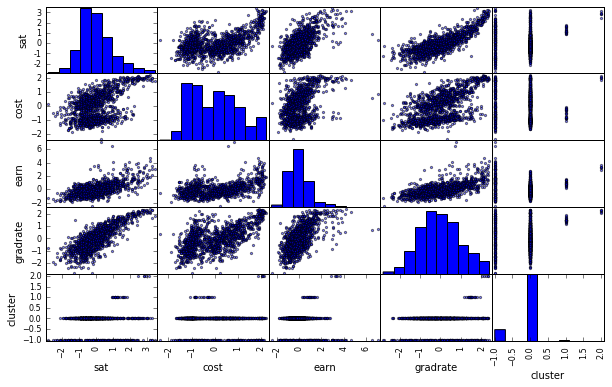

In [122]:
scatter_matrix(df)

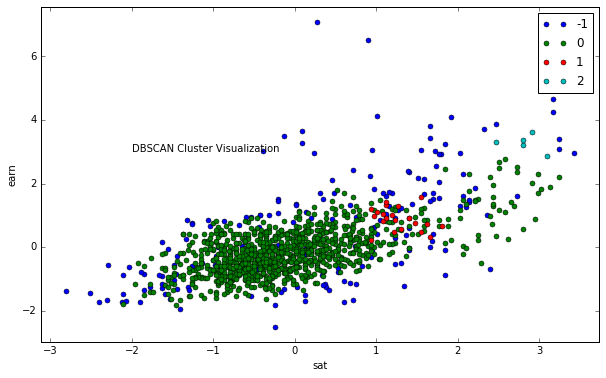

In [125]:
import matplotlib.pyplot as plt

groups = df.groupby('cluster')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling
for name, group in groups:
    ax.plot(group.sat, group.earn, marker='o', linestyle='', ms=5, label=name)
ax.legend()
ax.set_xlabel("sat")
ax.set_ylabel("earn")
ax.text(-2, 3, 'DBSCAN Cluster Visualization')


plt.show()

In [5]:
# temporal data
# I found that 2010 and 2011 are the only years with earnings data, reported
# for graduates six years prior (2006 and 2007)
# However 2009-2013 are the only years with cost data.


query = """
SELECT UNITID,
       INSTNM,
       CONTROL as type,
       COSTT4_A cost,
       Year
FROM Scorecard

where cost is not null

"""



dft = pandas.read_sql(query, conn)
dft.describe()
#dft

,UNITID,cost,Year
count,20504.000000,20504.000000,20504.000000
mean,234795.669040,23002.166699,2011.015558
std,110994.802588,11575.691881,1.410865
min,100654.000000,2200.000000,2009.000000
25%,157076.000000,13293.000000,2010.000000
50%,199625.000000,21395.500000,2011.000000
75%,240374.000000,29439.500000,2012.000000
max,483212.000000,74473.000000,2013.000000


In [20]:
# explore split-apply-combine with Pandas dataframes

grouped = dft.groupby(['type', 'Year'])
grouped.cost.mean()



type                Year
Private for-profit  2009    24722.214583
                    2010    25019.942885
                    2011    25842.545859
                    2012    25399.297345
                    2013    25654.190860
Private nonprofit   2009    29796.706355
                    2010    31130.604091
                    2011    32241.484454
                    2012    33442.437139
                    2013    34523.774839
Public              2009    12671.031953
                    2010    13253.603751
                    2011    13776.619163
                    2012    14322.836207
                    2013    14686.991369
Name: cost, dtype: float64

In [23]:
grouped.cost.describe()

type                Year       
Private for-profit  2009  count      960.000000
                          mean     24722.214583
                          std       7417.268359
                          min       5286.000000
                          25%      20105.750000
                          50%      24818.000000
                          75%      27631.750000
                          max      58535.000000
                    2010  count     1033.000000
                          mean     25019.942885
                          std       6109.575965
                          min       5102.000000
                          25%      21416.000000
                          50%      25119.000000
                          75%      28882.000000
                          max      54924.000000
                    2011  count     1123.000000
                          mean     25842.545859
                          std       6168.921507
                          min       5286.000000
        

In [19]:
grouped.size()

type                Year
Private for-profit  2009     960
                    2010    1033
                    2011    1123
                    2012    1130
                    2013    1116
Private nonprofit   2009    1369
                    2010    1369
                    2011    1383
                    2012    1384
                    2013    1399
Public              2009    1690
                    2010    1653
                    2011    1649
                    2012    1624
                    2013    1622
dtype: int64

In [29]:
x = grouped.cost.mean()
x

type                Year
Private for-profit  2009    24722.214583
                    2010    25019.942885
                    2011    25842.545859
                    2012    25399.297345
                    2013    25654.190860
Private nonprofit   2009    29796.706355
                    2010    31130.604091
                    2011    32241.484454
                    2012    33442.437139
                    2013    34523.774839
Public              2009    12671.031953
                    2010    13253.603751
                    2011    13776.619163
                    2012    14322.836207
                    2013    14686.991369
Name: cost, dtype: float64

In [28]:
x.get_values()

array([ 24722.21458333,  25019.9428848 ,  25842.54585931,  25399.29734513,
        25654.19086022,  29796.706355  ,  31130.60409058,  32241.48445409,
        33442.43713873,  34523.77483917,  12671.03195266,  13253.60375076,
        13776.61916313,  14322.8362069 ,  14686.99136868])

In [30]:
x.keys()

MultiIndex(levels=[[u'Private for-profit', u'Private nonprofit', u'Public'], [2009, 2010, 2011, 2012, 2013]],
           labels=[[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], [0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4]],
           names=[u'type', u'Year'])

In [53]:
pandas.DataFrame(x)

cost
type               Year              
Private for-profit 2009  24722.214583
                   2010  25019.942885
                   2011  25842.545859
                   2012  25399.297345
                   2013  25654.190860
Private nonprofit  2009  29796.706355
                   2010  31130.604091
                   2011  32241.484454
                   2012  33442.437139
                   2013  34523.774839
Public             2009  12671.031953
                   2010  13253.603751
                   2011  13776.619163
                   2012  14322.836207
                   2013  14686.991369

Principle Components Analsis (PCA)

In [131]:
dfscale.columns

Index([u'sat', u'cost', u'earn', u'gradrate', u'cluster'], dtype='object')

In [134]:
from sklearn.decomposition import PCA

In [135]:
pca = PCA(n_components=4)
pca.fit(dfscale[[u'sat', u'cost', u'earn', u'gradrate']])
print(pca.explained_variance_ratio_)

[ 0.70938183  0.1441152   0.10172053  0.04478244]


In [137]:
pca = PCA(n_components=2)
pcaArray = pca.fit_transform(dfscale[[u'sat', u'cost', u'earn', u'gradrate']])
dfpca = pandas.DataFrame(pcaArray)

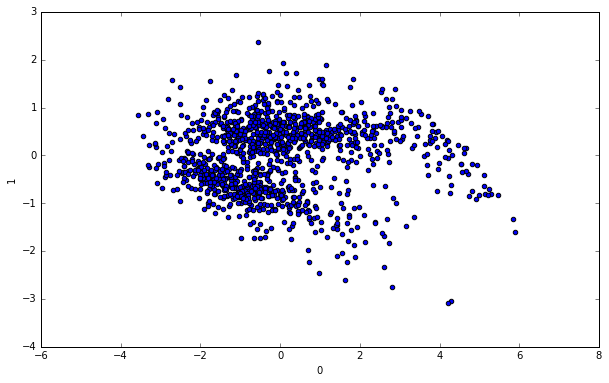

In [140]:
dfpca.plot.scatter(x=0, y=1)